# Reza Moshksar's assessment for CIHI

For this assessment I used Python Language.
* IPython: Jupyter Notebook
* Numpy: For mathematical computation
* Pandas: For mathematical computation and working with the dataset
* Matplotlib, seaborn: For plot charts
* Sklearn: For Machine Learning
* Keras: For Deep learning

# Loading Libraries

In [98]:
#!/usr/bin/env python -W ignore::DeprecationWarning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np
# Plot libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
# others
from time import time


In [99]:
# SkLearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
## Models
from sklearn.linear_model import RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB,  MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier
## Tools and metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectFromModel

# Loading Labels

In [100]:
Labels_path=r'C:\Users\Reza\Desktop\Assessment\labels_Candidate.csv'
df_label=pd.read_csv(Labels_path,header=None)
df_label.columns=['sentence','label']
df_label.index=df_label.sentence
df_label.drop('sentence',axis=1,inplace=True)
df_label.head()
df_label.shape

(5572, 1)

In [101]:
label_train_and_test=df_label[:4000]
label_predict=df_label[4000:]
label_train_and_test.shape

(4000, 1)

## Data exploration
### Exploring label data

In [102]:
label_train_and_test.head()

,label
sentence,
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [103]:
label_train_and_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 1 columns):
label    4000 non-null float64
dtypes: float64(1)
memory usage: 62.5 KB


In [104]:
label_train_and_test.describe()

,label
count,4000.000000
mean,0.133750
std,0.340426
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Label distribution

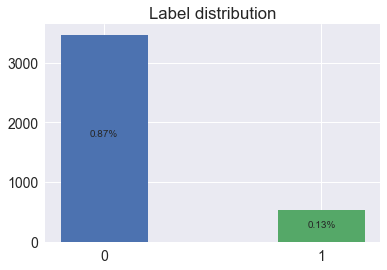

Label 0 percentage distribution = 0.86625
Label 1 percentage distribution = 0.13375


In [105]:
one=int(label_train_and_test[label_train_and_test.label==1].count())
zero=int(label_train_and_test[label_train_and_test.label==0].count())
one_percentage=one/int(label_train_and_test.count())
zero_percentage=zero/int(label_train_and_test.count())
fig, ax = plt.subplots()
plt.title('Label distribution')
bar0=plt.bar('0',zero,width=.4)
bar1=plt.bar('1',one,width=.4)
for b in bar0:
    height = b.get_height()
    ax.text(b.get_x() + b.get_width()/2.,height*.5,
                str(round(zero_percentage,2)) + "%", ha='center', va='bottom')
for b in bar1:
    height = b.get_height()
    ax.text(b.get_x() + b.get_width()/2., height*.4,
                str(round(one_percentage,2)) + "%", ha='center', va='bottom')
plt.show()
print ('Label 0 percentage distribution = {}'.format(zero_percentage))
print ('Label 1 percentage distribution = {}'.format(one_percentage))


#### Results:
* Training and test dataset has 2 classes (0, 1)
* There isn't any null in labels
* There are 4000 labels with class
* When we have a small positive class, then F1-score makes more sense and it deals better with class imbalance.

#### Conclusion
I will use F1-score for evaluating this dataset

### Exploring none-Label part

In [106]:
label_predict.head()

,label
sentence,
4000,NaN
4001,NaN
4002,NaN
4003,NaN
4004,NaN


In [107]:
label_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 4000 to 5571
Data columns (total 1 columns):
label    0 non-null float64
dtypes: float64(1)
memory usage: 24.6 KB


In [108]:
label_predict.describe()

,label
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


#### Results:
* Prediction dataset doesn't have any label.
* There isn't any null in the first column (sentence number)
* There are 1572 rows.

# Loading text file
As mentioned in the attached document the text is encoded so I can not clean it.

In [109]:
text_path=r'C:\Users\Reza\Desktop\Assessment\train.txt'
# Load the file as ISO-8859-1
df_txt=pd.read_csv(text_path,encoding='ISO-8859-1',header=None)
#Set heading
df_txt.columns=['sentence','array','word']


## Exproling text file

In [110]:
df_txt.head()

,sentence,array,word
0,0,1,hp
1,0,2,voujm
2,0,3,kvspoh
3,0,4,qpjou
4,0,5,dsbaz


### Word cloud Chart
Have a rough look at the text file.

In [111]:
# Finding Tf-idf words to not show them at the word cloud
text = df_txt.word
vectorizer = TfidfVectorizer()
vectorizer.fit(text)
voc_dict=vectorizer.vocabulary_
most_used_words = sorted(voc_dict, key=(lambda key:voc_dict[key]), reverse=True)[:1000]

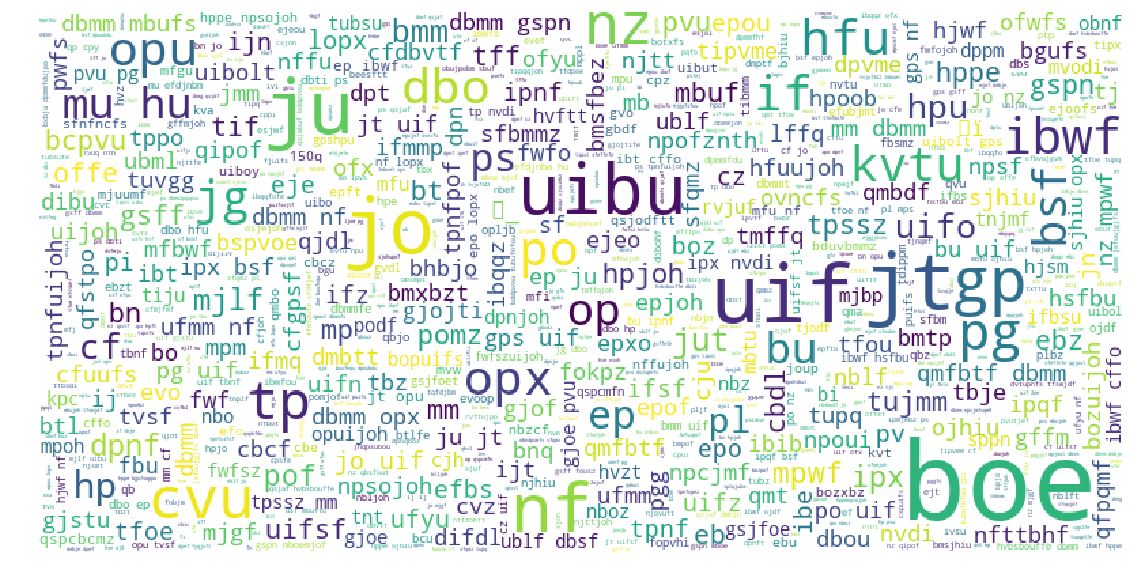

In [112]:
# Generate a word cloud image
with open(text_path) as f:
    text=f.read()
wordcloud = WordCloud().generate(text)
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=4000,max_font_size=80, relative_scaling=.8,width=800, height=400,stopwords=most_used_words).generate(text)
#plt.figure()
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Result:
The text is encoded!

In [113]:
df_txt.describe()

,sentence,array
count,90106.000000,90106.000000
mean,2762.436231,12.872550
std,1611.336080,12.819149
min,0.000000,1.000000
25%,1372.000000,5.000000
50%,2748.000000,10.000000
75%,4167.000000,18.000000
max,5571.000000,190.000000


In [114]:
df_txt.dtypes

sentence     int64
array        int64
word        object
dtype: object

In [115]:
# Most frequent words in data base
df_txt.word.value_counts().head(10)

j      3001
up     2242
zpv    2240
b      1433
uif    1328
v      1192
boe     979
jo      898
jt      890
nf      802
Name: word, dtype: int64

## Searching for null data

In [116]:
df_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90106 entries, 0 to 90105
Data columns (total 3 columns):
sentence    90106 non-null int64
array       90106 non-null int64
word        90106 non-null object
dtypes: int64(2), object(1)
memory usage: 2.1+ MB


In [117]:
df_txt.word.isnull().sum()

0

### Check for '-' instead of null

In [118]:
df_txt[df_txt.word=='-'].word.sum()

0

### Check for '?' instead of null

In [119]:
df_txt[df_txt.word=='?'].word.sum()

0

### Check for '.' instead of null

In [120]:
df_txt[df_txt.word=='.'].word.sum()

0

### Check for empty

In [121]:
df_txt[df_txt.word==''].word.sum()

0

#### Result:
There isn't any null in data set.


## Is there any missing Sentence? 

In [122]:
check_df=pd.DataFrame(df_txt.groupby('sentence')['word'].apply(lambda x: ' '.join(x)))
check_df=check_df.reset_index()
check_df[check_df.index<check_df.sentence].head(1)

,sentence,word
3374,3375,hppe bgufsopo nz mpwf ipx bsf upebz j ipqf zpv...


#### Result
Sentence 3374 is missed.

## Is there any missing word?

In [123]:
df2=pd.DataFrame(df_txt.groupby('sentence')['word'].apply(len))
df2.columns=['lenght']
df2['maximum']=pd.DataFrame(df_txt.groupby('sentence')['array'].apply(max))
df2.head()

,lenght,maximum
sentence,,
0,20,20
1,6,6
2,33,33
3,11,11
4,14,14


In [124]:
df2[df2.lenght!= df2.maximum]

,lenght,maximum
sentence,,


#### Result
There isn't any missed word.

## Making Sentence

In [125]:
# Make words of sentences as List
df_words=pd.DataFrame(df_txt.groupby('sentence')['word'].apply(lambda x: ' '.join(x)))
label_train_and_test
df=pd.concat([df_words,label_train_and_test],axis=1,join='inner')
df.columns=['sentence','labels']
df.index.name='number'
df=df.reindex()
df.shape

(3999, 2)

In [126]:
df_words.head()

,word
sentence,
0,hp voujm kvspoh qpjou dsbaz bwbjmbcmf pomz jo ...
1,pl mbs kpljoh xjg v poj
2,gsff fousz jo 2 b xlmz dpnq up xjo gb dvq gjob...
3,v evo tbz tp fbsmz ips v d bmsfbez uifo tbz
4,obi j epo u uijol if hpft up vtg if mjwft bspv...


In [127]:
X_predict=df_words[3999:]

## Sentence length distribution

Text(0.5,1,'Sentences lenght cdf chart')

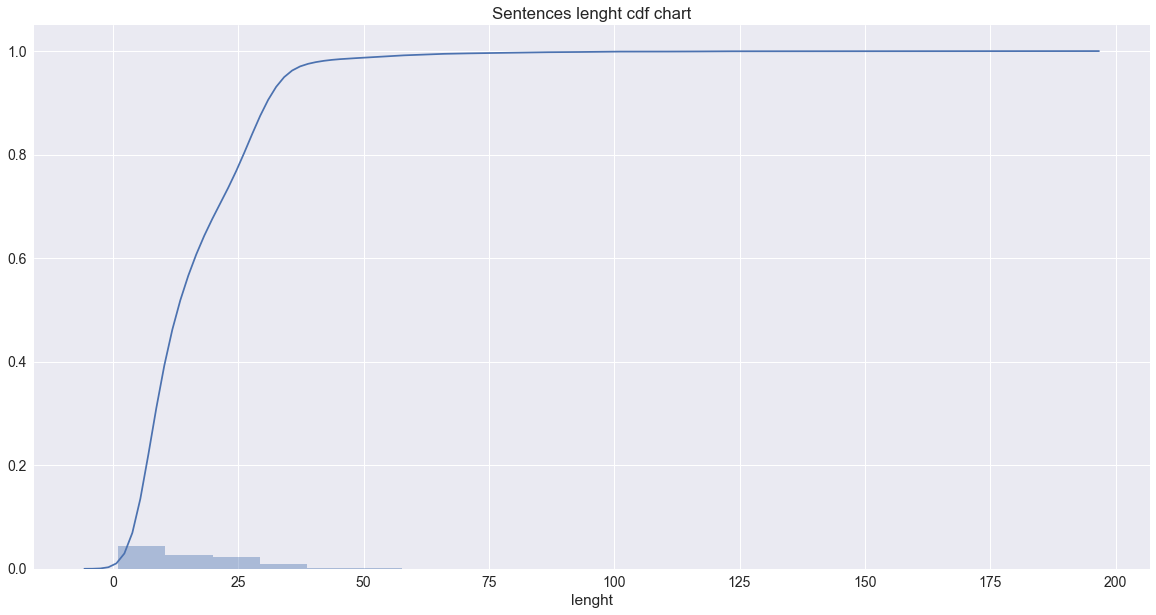

In [128]:
plt.figure(figsize=(20,10))
sns.distplot(df2.lenght,kde_kws=dict(cumulative=True),bins=20)
plt.title('Sentences lenght cdf chart')

In [129]:
df2[df2.lenght>100].count()

lenght     5
maximum    5
dtype: int64

#### Result
5 sentences length are more than 100 words.

Text(0.5,1,'Showing large Sentence outliers')

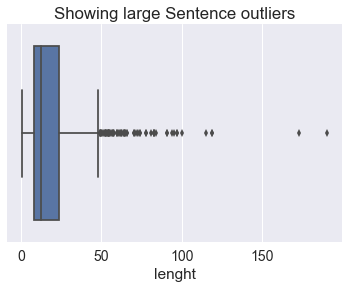

In [130]:
sns.boxplot(df2.lenght)
plt.title('Showing large Sentence outliers')

In [131]:
df2[df2.lenght>50].count()

lenght     69
maximum    69
dtype: int64

#### Result
According to the sentence length, Sentences larger than 50 are outliers.
There are 69 sentences which are larger than 50 words.

Text(0.5,1,'Sentences lenght histogram chart')

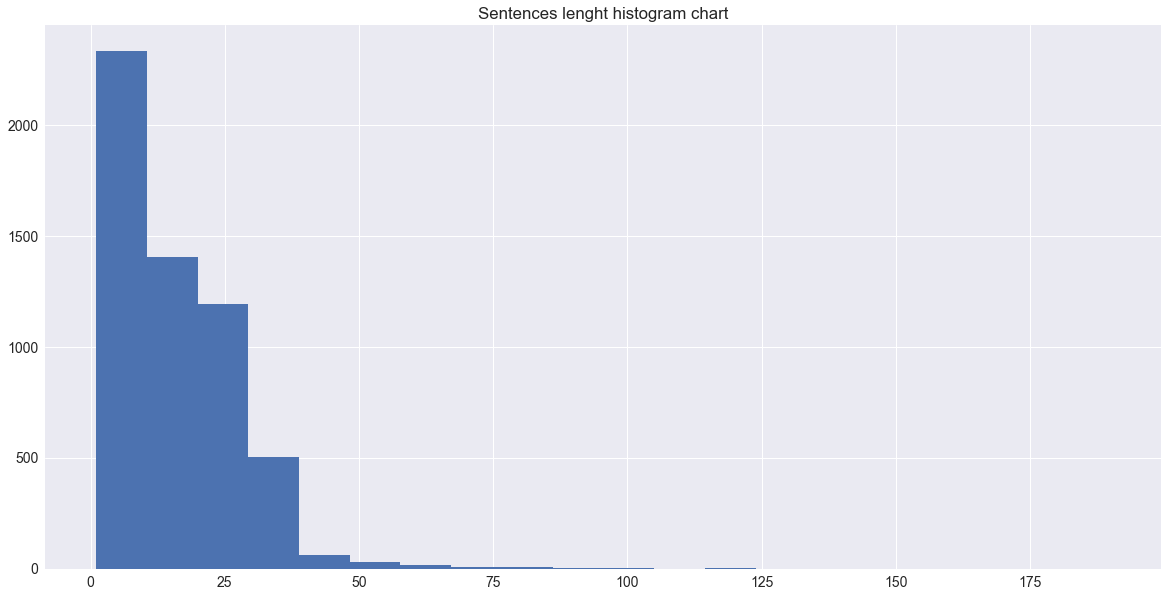

In [132]:
plt.figure(figsize=(20,10))
plt.hist(df2.lenght,bins=20)
plt.title('Sentences lenght histogram chart')

# Result
* All columns have value and there isn't any null.
* There isn't any missed word in sentences.
* Sentence number 3374 missed .
* Sentence numbers start from 0 to 5571.
* The shortest sentence has 1 word and the longest is 190 words.
* There are 69 sentences larger than 50 words which are outliers.

# Machine learning models
To predict labels I tried to test some machine learning supervised classifiers. 

In [133]:
def run_classifiers (model):
    model0=model
    model=Pipeline([('vect', CountVectorizer(analyzer = 'word',lowercase = False)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', model)])
    # fit model
    t0 = time()
    model.fit(X_train, y_train)
    train_time = time() - t0

    #Predict
    t0 = time()
    Y_predict = model.predict(X_test)
    test_time = time() - t0
    
    # Scores
    score = accuracy_score(y_test, Y_predict)
    f1_scores=f1_score(y_test, Y_predict, average='binary')
    cross_val_scores=cross_val_score(estimator=model, X=X, y=Y, cv=10 ,scoring='f1')
    
    #get model name
    model_name = str(model0).split('(')[0]
    
    if "penalty='" in str(model0):
        model_name+= '\nwith '+str(model0).split("penalty='")[1].split("'")[0]+ ' regularization'
    if 'Pipeline' in model_name:
        model_name='LinearSVC\nwith l2 regularization'
        
    # plot confusion matrix 
    Score_matrix_chart (y_test,Y_predict,model_name)
    
    return model_name, score, train_time, test_time, f1_scores, cross_val_scores.mean()

In [134]:
def classifiers():
    
    # Linear_model
    results.append(run_classifiers(RidgeClassifier(tol=1e-2, solver="sag")))
    results.append(run_classifiers(SGDClassifier(alpha=.0001, penalty="l2", n_jobs=-1)))
    results.append(run_classifiers(SGDClassifier(alpha=.0001,penalty="elasticnet", n_jobs=-1)))
    results.append(run_classifiers(Perceptron( tol=1e-3, n_jobs=-1)))
    results.append(run_classifiers(PassiveAggressiveClassifier( tol=1e-3, n_jobs=-1)))
    results.append(run_classifiers(LogisticRegression(tol=1e-3 ,solver='liblinear', penalty="l1")))
    results.append(run_classifiers(LogisticRegression(tol=1e-3 ,solver='liblinear', penalty="l2")))
    
    # SVM
    results.append(run_classifiers(LinearSVC(penalty="l2", dual=False,tol=1e-3)))
    results.append(run_classifiers(LinearSVC(penalty="l1", dual=False,tol=1e-3)))
    results.append(run_classifiers(Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3))),
      ('classification', LinearSVC(penalty="l2"))])))

    # Naive_bayes
    results.append(run_classifiers(MultinomialNB(alpha=.01)))
    results.append(run_classifiers(BernoulliNB(alpha=.01)))
    
    # Neighbors
    results.append(run_classifiers(KNeighborsClassifier(n_neighbors=2, n_jobs=-1)))
    results.append(run_classifiers(NearestCentroid()))
    
    # Ensemble
    results.append(run_classifiers(RandomForestClassifier(n_estimators=100, n_jobs=-1)))
    
    # Neural_network
    # MLPClassifier consuming more computational resources
    #results.append(run_classifiers(MLPClassifier(max_iter=100)))
    #results.append(run_classifiers(MLPClassifier(hidden_layer_sizes=(50, ), max_iter=100)))

    return results

In [135]:
def plot_finall_chart (results):
    sns.set(font_scale=1.1)
    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(6)]

    clf_names, score, training_time, test_time,f1_score, cross_val_score = results

    # Normalizing time
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    # Plot
    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .15, label="score", color='navy')
    plt.barh(indices + .2, f1_score, .15, label="f1_score", color='red')
    plt.barh(indices + .4, cross_val_score, .15, label="cross_val_f1", color='darkorange')
    plt.barh(indices + .6, training_time, .15, label="training time", color='c')
    plt.barh(indices + .8, test_time, .15, label="test time", color='green')


    plt.yticks(())
    plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()

In [136]:
def Score_matrix_chart (y_test,Y_predict,name):
    sns.set(font_scale=1.4)
    plt.figure(figsize=(8,6))
    matrix=confusion_matrix(y_test, Y_predict)
    f1=f1_score(y_test, Y_predict, average='binary')
    df_cm = pd.DataFrame(matrix, index = [i for i in "01"],columns = [i for i in "01"])
    ax= plt.subplot()
    sns.heatmap(df_cm, annot=True, ax = ax,cmap="YlGn", fmt='g')
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix for '+name); 
    ax.set_xlabel('Predicted labels\nF1_score={:0.2f}'.format(f1),{'fontname':'Arial', 'size':'14'})
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);
    plt.show()


## Split Test and Train

In [41]:
results = []
X=df.sentence
Y=df.labels
# train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size = 0.33, random_state=2019)

## Apply Classifiers and plot confusion Matrix

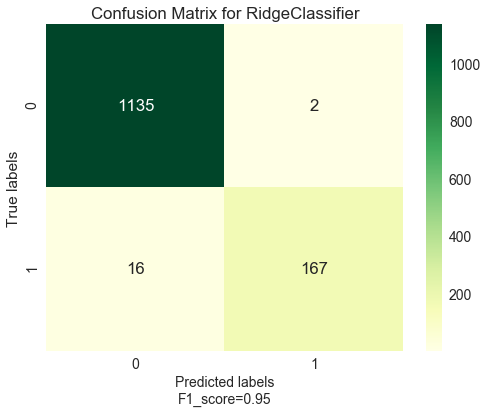

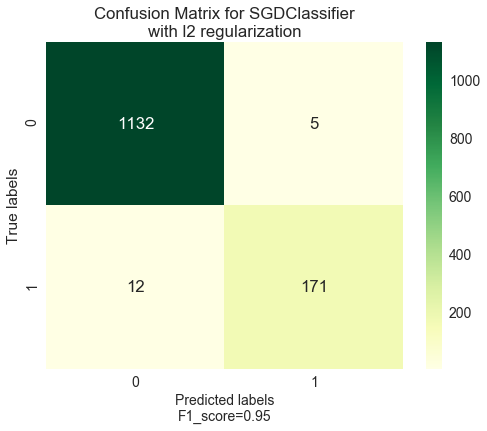

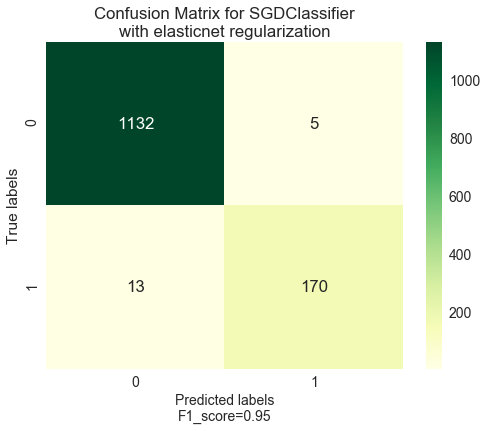

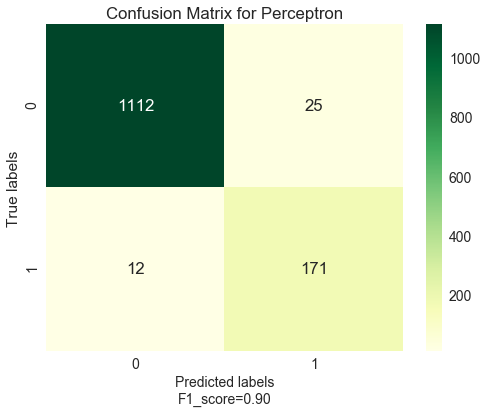

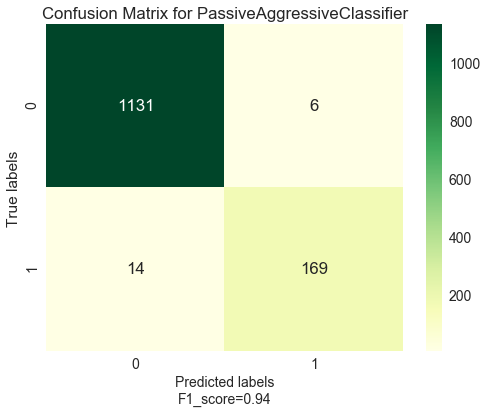

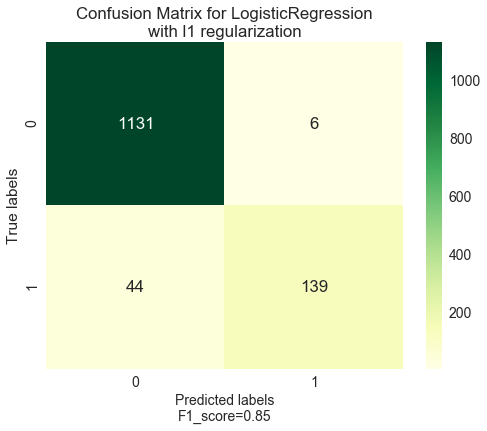

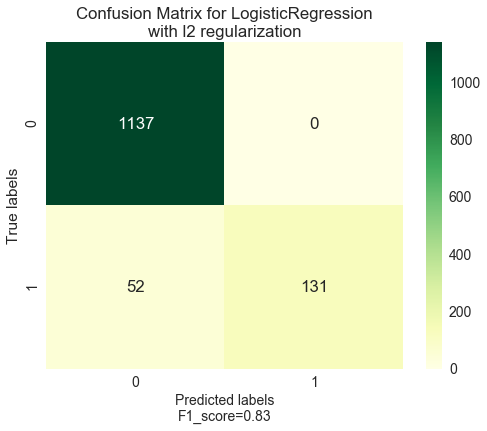

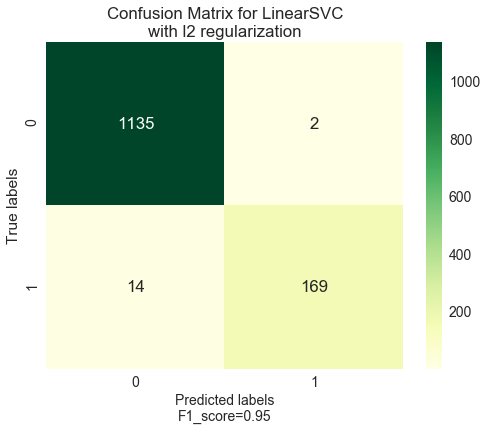

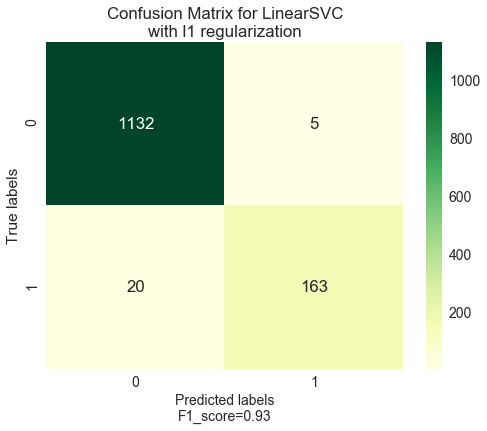

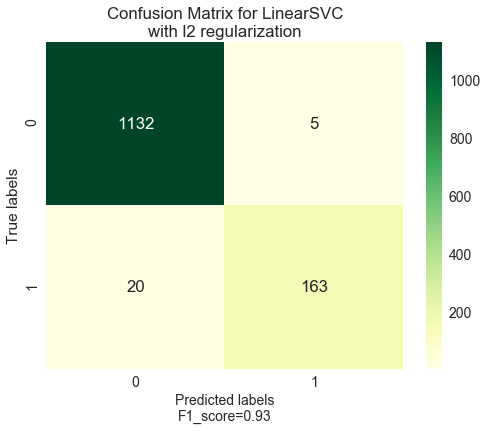

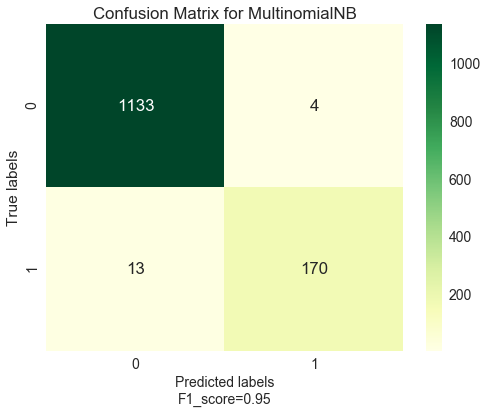

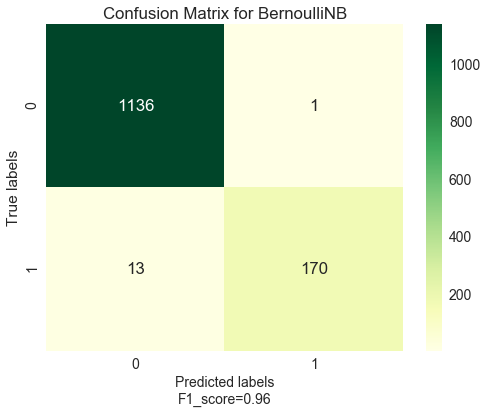

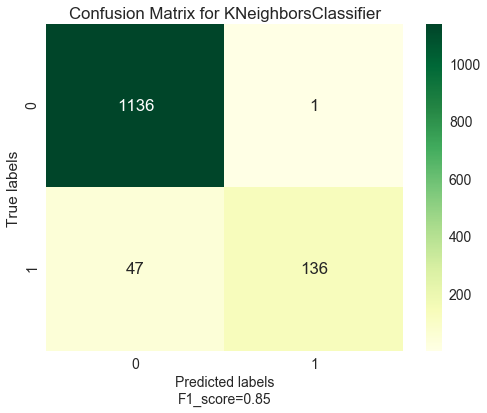

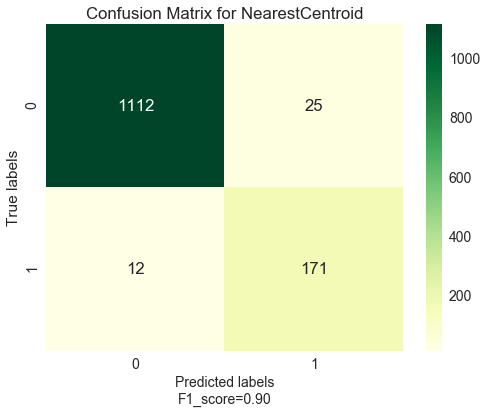

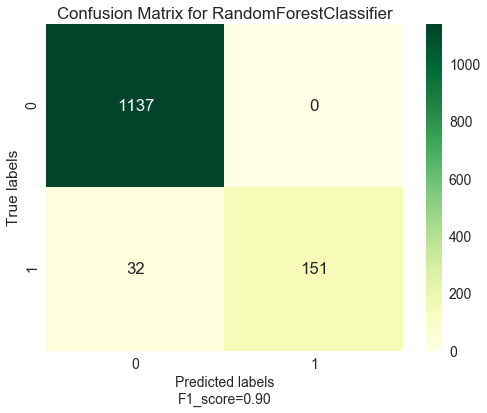

In [42]:
results= classifiers()
plt.show()

## Selecting Classifier

In [43]:
result_df=pd.DataFrame(results,columns=['cls', 'score', 'training_time', 'test_time','f1_score', 'cross_val_score'])
sorted_df=result_df.sort_values(by=['cross_val_score', 'training_time','test_time'], ascending=[False, True,True])
sorted_df

,cls,score,training_time,test_time,f1_score,cross_val_score
11,BernoulliNB,0.989394,0.061798,0.021975,0.960452,0.953247
2,SGDClassifier\nwith elasticnet regularization,0.986364,0.061835,0.027925,0.949721,0.949516
10,MultinomialNB,0.987121,0.060812,0.020904,0.952381,0.945886
7,LinearSVC\nwith l2 regularization,0.987879,0.066820,0.019949,0.954802,0.944347
1,SGDClassifier\nwith l2 regularization,0.987121,0.083735,0.018991,0.952646,0.942729
4,PassiveAggressiveClassifier,0.984848,0.056848,0.018950,0.944134,0.940550
0,RidgeClassifier,0.986364,0.080770,0.017932,0.948864,0.940472
9,LinearSVC\nwith l2 regularization,0.981061,0.073838,0.023917,0.928775,0.931494
8,LinearSVC\nwith l1 regularization,0.981061,0.076795,0.026928,0.928775,0.925762
14,RandomForestClassifier,0.975758,0.325185,0.130041,0.904192,0.902488


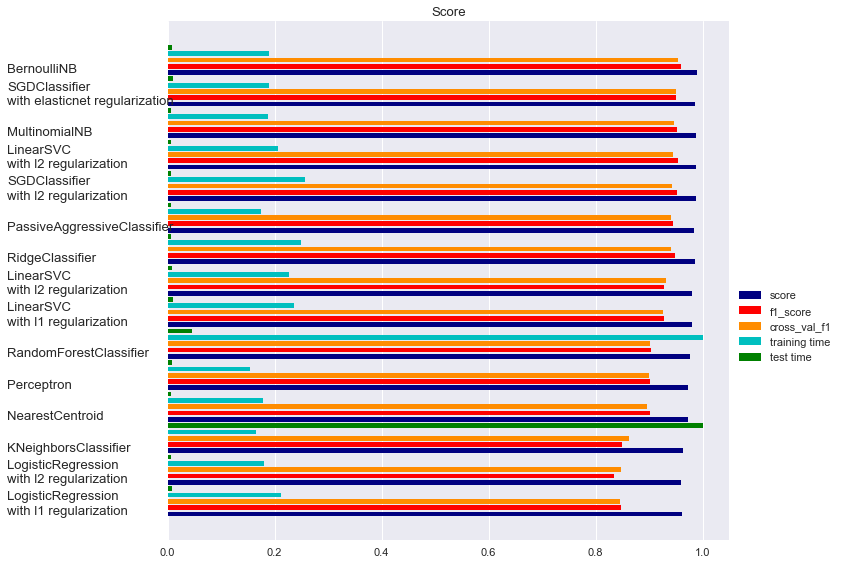

In [44]:
plot_finall_chart (np.array(sorted_df)[::-1]) 

## Conclusion
Based of confusion matrixes and training and predicting time-consuming BernoulliNB for this data set had the best performance.

## BernoulliNB 


In [45]:
model_BernoulliNB = Pipeline([('vect', CountVectorizer(analyzer = 'word',lowercase = False)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', BernoulliNB(alpha=.01))])

# Tuneing parameters MultinomialNB
tuned_parameters_BernoulliNB = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2, 1e-3]
}

#### BernoulliNB with pre-defined settings (without tuning)

In [46]:
model_BernoulliNB.fit(X_train, y_train)
Y_predict = model_BernoulliNB.predict(X_test)

#Scoring
score = accuracy_score(y_test, Y_predict)
f1_scores=f1_score(y_test, Y_predict, average='binary')
cross_val_scores=cross_val_score(estimator=model_BernoulliNB, X=X, y=Y, cv=10 ,scoring='f1').mean()   
print ('Accuracy of BernoulliNB = {:0.3f}; f1_scores= {:0.3f};  cross_val_f1_Score= {:0.3f}'.format(score, f1_scores, cross_val_scores) )


Accuracy of BernoulliNB = 0.989; f1_scores= 0.960;  cross_val_f1_Score= 0.953


#### BernoulliNB with tuning

In [47]:
model_BernoulliNB_tuned = GridSearchCV(model_BernoulliNB, tuned_parameters_BernoulliNB,  n_jobs=-1)
model_BernoulliNB_tuned.fit(X_train, y_train)
Y_predict = model_BernoulliNB_tuned.predict(X_test)

In [48]:
print('The Best params for BernoulliNB => '+ str(model_BernoulliNB_tuned.best_params_))

The Best params for BernoulliNB => {'clf__alpha': 0.1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}


### Confusion Matrix

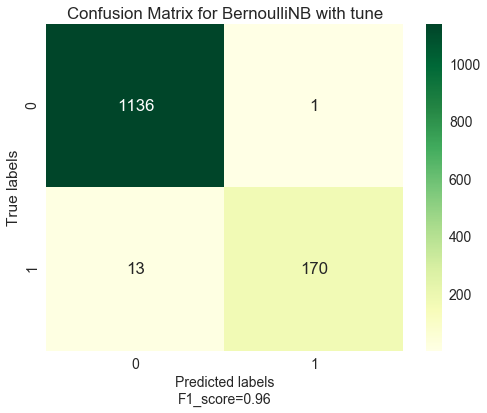

In [49]:
Score_matrix_chart (y_test,Y_predict,'BernoulliNB with tune')

### BernoulliNB score

In [50]:
score = accuracy_score(y_test, Y_predict)
f1_scores=f1_score(y_test, Y_predict, average='binary')
cross_val_scores=cross_val_score(estimator=model_BernoulliNB_tuned, X=X, y=Y, cv=10 ,scoring='f1').mean()   
print ('Accuracy of BernoulliNB = {:0.3f}; f1_scores= {:0.3f};  cross_val_f1_Score= {:0.3f}'.format(score, f1_scores, cross_val_scores) )

Accuracy of BernoulliNB = 0.989; f1_scores= 0.960;  cross_val_f1_Score= 0.952


# Deep Learning

In [51]:
# Keras Library
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding, LSTM , Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import Callback
# Library for calculating precision and recall
import keras_metrics

Using TensorFlow backend.


In [52]:
# function for polt loss and accuracy
def History_chart(history):
    # F1-score
    precision=np.array(history.history['precision'])
    recall=np.array(history.history['recall'])
    f1=(2.0 * precision * recall) / (precision + recall)
    # Val_F1-score
    val_precision=np.array(history.history['val_precision'])
    val_recall=np.array(history.history['val_recall'])
    val_f1=(2.0 * val_precision * val_recall) / (val_precision + val_recall)
    
    # Plot
    plt.plot(f1)
    plt.plot(val_f1)
    #plt.plot(history.history['acc'])
    #plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    #plt.legend(['Train F1-Score', 'Test F1-Score','Train', 'Test'], loc='upper left')
    plt.legend(['Train F1-Score', 'Test F1-Score'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

### Process the data


In [152]:
epoch=20
max_words = 7000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_X_train = sequence.pad_sequences(sequences,maxlen=max_len)

### Define models

In [153]:
def LSTM_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    
    
    #model.add(Embedding(max_words, input_length=max_len))
    
    model.add(LSTM(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    #model.add(Dense(128,name='FC1'))
    #model.add(BatchNormalization())
    #model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(units=1, activation='sigmoid',name='out_layer'))
    return model

In [157]:
def CNN_model():
    model = Sequential()
    model.add(Embedding(max_words, 100,input_length=max_len))
    
    model.add(Conv1D(100, 5, activation='relu'))
    model.add(MaxPooling1D(5))

    model.add(Conv1D(100, 5, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Flatten())

    model.add(Dense(128,name='FC1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(units=1, activation='sigmoid',name='out_layer'))
    return model

### Call the function and compile the model.

In [56]:
def compile_model(model):
    print(model.summary())
    # Calculate precision for the second label.
    precision = keras_metrics.precision(label=1)
    # Calculate recall for the first label.
    recall = keras_metrics.recall(label=0)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',precision, recall])
    return model

### Fit on the training data.

In [57]:
def fit_model(model):
    t0 = time()   
    history=model.fit(sequences_X_train[:-100], y_train[:-100], 
              epochs=epoch, batch_size=128, verbose=1,
              validation_data=(sequences_X_train[-100:], y_train[-100:]))
    train_time = time() - t0
    return model,history,train_time

### Process the test set data.

In [58]:
def test_data_precess(X_test):
    sequences_X_test = tok.texts_to_sequences(X_test)
    sequences_X_test = sequence.pad_sequences(sequences_X_test,maxlen=max_len)
    return sequences_X_test

### Evaluate the model on the test set.

In [59]:
def evaluate_model(model,history):
    scores = model.evaluate(sequences_X_test, y_test, verbose=1)
    precision = history.history['val_precision'][-1]
    recall = history.history['val_recall'][-1]
    f_score = (2.0 * precision * recall) / (precision + recall)
    print ('Accuracy of CNN:{:0.2f}; F1-SCORE {:0.2f}; Training time: {:0.0f}s'.format(np.array(scores[1:]).mean(),f_score,train_time))

# LSTM

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 100)          700000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 200, 100)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 196, 64)           32064     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               66000     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100)               400       
_________________________________________________________________
activation_10 (Activation)   (None, 100)               0         
__________

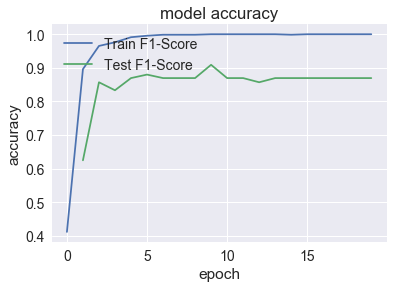

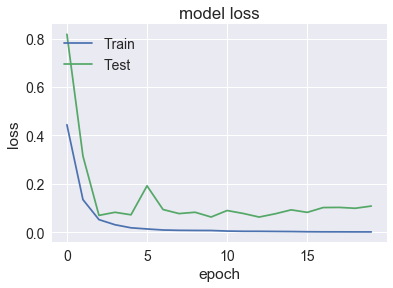

1320/1320 [==============================] - 2s 1ms/step
Accuracy of CNN:0.96; F1-SCORE 0.87; Training time: 57s


In [155]:
model=LSTM_model()
model=compile_model(model)
model,history,train_time=fit_model(model)
sequences_X_test=test_data_precess(X_test)
History_chart(history)
evaluate_model(model,history)

#### LSTM conclusion

* LSTM for sentences more than 100 words will have gradient vanish. (the data base has 5 sentence with more than 100 words)
* Comparing to other clasfiers for this case study LSTM takes more time for training and on bigger data bases it need more computational resources.
* Deep learning (LSTM) needs more data for learning and on few data in will overfit
* To speedup LSTM I mixed it with CNN

# CNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 200, 100)          700000    
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 196, 100)          50100     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 39, 100)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 35, 100)           50100     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 11, 100)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1100)              0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               140928    
__________

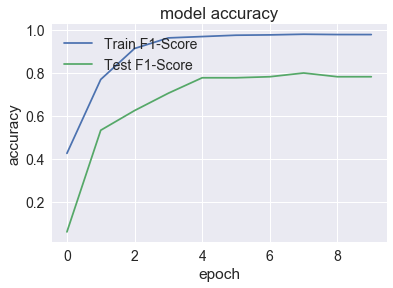

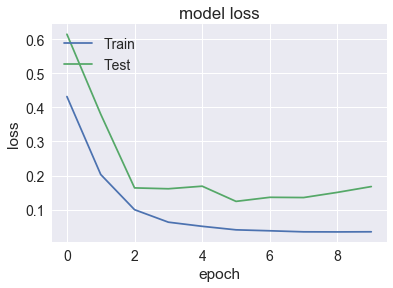

1320/1320 [==============================] - 0s 163us/step
Accuracy of CNN:0.90; F1-SCORE 0.78; Training time: 11s


In [161]:
epoch=10
model=CNN_model()
model=compile_model(model)
model,history,train_time=fit_model(model)
sequences_X_test=test_data_precess(X_test)
History_chart(history)
evaluate_model(model,history)

# Finall Conclution + Model selection

According to these reasons BernoulliNB is chosen and tuned:
* To compare with deep learning classifiers, the traditional machine learning classifiers    
 * are simpler
 * have better computational performance
 * have better explainability
*  Due to performance with this dataset, BernoulliNB is the best in the machine learning classifiers
* I used F1-score for evaluation, because it deals better with class imbalance.

# Label Prediction

In [170]:
# Predicting based on tuned BernoulliNB
Y_predict = model_BernoulliNB_tuned.predict(X_predict.word)
Y_df=pd.DataFrame(Y_predict)
# Re-index
X_predict.index=np.arange(len(X_predict))
Y_df.index=np.arange(len(X_predict))
# Join
prediction_df=pd.concat([X_predict,Y_df],axis=1)
prediction_df.columns=['Sentences','Labels']

## Write CSV

In [169]:
prediction_df.to_csv('prediction.csv', encoding='utf-8')
prediction_df.head(15)

,Sentences,Labels
0,if t kvtu hpoob xpssz gps opuijoh boe if xpo u...,0.0
1,eje zpv hfu boz hjgu uijt zfbs j ejeou hfu boz...,0.0
2,tpnfxifsf pvu uifsf cfofbui uif qbmf nppo mjhi...,0.0
3,xfmm uifsf t b qbuufso fnfshjoh pg nz gsjfoet ...,0.0
4,px v efz j qbje 60 400uipvtbe j upme v xpvme dbmm,0.0
5,jn gjof cbcft bjou cffo vq 2 nvdi uip tbx tdbs...,0.0
6,j n sfbdijoh ipnf jo 5 njo,0.0
7,gpshpu zpv xfsf xpsljoh upebz xboob dibu cvu u...,0.0
8,ib uifo xf nvtu xbml up fwfszxifsf dboopu ublf...,0.0
9,xbo2 xjo b nffu hsffu xjui xftumjgf 4 v ps b n...,1.0
